## Cellular Automata Traffic- MOTORWAY MADNESS II - Logbook 1  ##

### Single Lane System ###

In [1]:
import numpy as np                                  #imports
import matplotlib.pyplot as plt

### 5/2:  ###

The first thing to do it to create the road that the cars will travel on> This created as a  NumPy array, which is n spaces long and filled with zeros, where n is the length of the road. Then generating the cars on the road; a random allocation of cars with various speeds was implented by iterating through every time step and using a random number generator between 0 and 100. If this number was greater than a certain integer, it was created with a random velocity up to its maxium velocity. The integer that would indicate whether a car would be produced gives us the probability of generation.
<br>
I am using a closed system as that is far easier to implement.
<br>
Firstly to implement the first rule of the CA, cars must "look ahead" for the drivers to see how far the car in front is and how fast it is moving. The car in front must be sufficently far enough in front, for the car to increase its speed. Initially i tried this:<br>

sum(road[i:i+int(road[i])])<road[i]<br>

However this breaks down if there is a car ahead going slower than the difference  in space  between the two cars.
solved this by having it equal to 0, therefore there are no cars in its way. This proved successful- rule one implemented.
<br>
### 6/2: ###
When looking at implementing  the next rule, each car must look at exactly how far in front the next car is. For this I implemented a count system that iterates through the spaces between the car in question and the one that is in front, to determine the distance between. Used this:
(This was then changed in the future). 

        count = i<br>
            if road[count+1]==0:<br>
                count+=1<br>
            else:<br>
                road[i]=count-i<br>
                count = 0<br>
<br>                
The new velocity of the cars would be this distance.
<br>
This proved sucessful until this iteration: <br>

[0. 0. 1. 0. 3. 2. 0. 0. 0. 0. 4. 0. 0. 0. 0.]<br>
[0. 0. 1. 0. 3. 3. 0. 0. 0. 0. 5. 0. 0. 0. 0.]<br>

there is a fault at index i = 4<br>

this was fixed by having a special case whereby if there is a car directly in front the car behind will have its velocity drop to zero. If not then a while loop will implement the rule.<br>
<br>
However we then run into a major problem. in the eyes of the programme this car now no longer exsits, as having a velocity of zero and thus an element value of zero, it is equivalent to not having a car in that space at all. 
To temporarily fix this we will shift the velocities so that stationary cars are indicated by the number 1, and a car traveling at arbitrary speed 5 will be denoted by a number 6. This proves to be effective as seen by example at indexes 1 and 2:<br>

[0. 3. 3. 2. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 5.]<br>
[0. 1. 1. 3. 0. 0. 0. 3. 0. 0. 0. 0. 1. 0. 6.]<br>
<br>
Again used random number generation to implement the probability of dawdeling- the velocity of the car is reduced by 1. Rule 3 implemented.<br>

### 7/2: ###

For the forth rule of the CA, I am skeptical to use roll until i have a better grip of how to alter the velocities of the cars. As the cars are moving at differnt velocities they must move forward at differnt rates, however the roll function is only able to move each element in the array by the same amount (to my knowlegde). So each element needed to be moved individually a unique amount.<br>
<br>
When having the cars move along, the issue of cars that ran past the end of the road proved tricky as i was met with this error:

index 20 is out of bounds for axis 0 with size 20<br>

when trying to implement this:<br>

if i+6>n:  <br>                                    
    if i+road[i]>n:<br>
        road[i]=0<br>               
<br>
This was solved by having the cars at the end of the road that will move past the end of the road, replaced with zero, indicating that they will disappear off the road once they extend past this. <br>
<br>
Another issue is that cars are written over by cars behind them that are looking to move into spaces where they may have been. This was solved by iterating through the length of the road backwards:
<br>
for i in range(np.size(road)-1, -1, -1): <br>
<br>
When moving the cars they must be inserted at i+speed. when the old velocity is removed the element is now and index 1+element-1 which is equal to i+speed<br>
<br>
In order to temporality overcome the problem of velocities needing to be +1, when printing i had all the velocities reduced by one and empty spaces left as spaces. 

However in one iteration were me with this scenario where whereby the car at the end will not move:<br>
<br>
0 [3.0, 0.0, 1.0, 2.0, 0.0, 3.0, ' ', 3.0, 2.0, 4.0, 0.0, 4.0, 0.0, 3.0, ' ', ' ', 4.0, 1.0, 1.0, 0.0]<br>
1 [0.0, 0.0, 1.0, 0.0, ' ', 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ' ', 1.0, 1.0, ' ', 0.0, 0.0, 0.0, 0.0]
<br>
2 [0.0, 0.0, 1.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ' ', 1.0, 1.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0]
<br>
3 [0.0, ' ', 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
4 [' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
5 [0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
6 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ' ', 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
7 [0.0, 0.0, 0.0, 0.0, 1.0, ' ', 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
8 [0.0, 0.0, 0.0, ' ', 1.0, 1.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
9 [0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
10 [0.0, ' ', 1.0, 0.0, 0.0, 0.0, ' ', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<br>
<br>This is because it was stationary and as the car at the end doesnt iteract with any vehicles in front of it, thus its velocity doesn't change and it will not move beyond the road, but simply causes a standstill behind it. Implemented a rule to stop this from happening, by setting last element to zero- as if there was any car in that space it would drives off.
<br>
The next step was to make the code a function so that I could call several different parameters, such as density level or dawdling probaility.

In [ ]:
def single_lane_road_open(n, div, vmax, v_initial, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        div = rate of new cars joining the road
        vmax = max speed of the cars
        v_initial = speed of the cars when joining the road
        prob_car_daw = probability of the cars dawdeling 
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations as well as a data matrix to store information about the road.
    road = np.zeros(n)                          
    matrix = np.zeros((max_iterations, n))
    data= np.zeros((max_iterations, 3))
    iterations = 1
    
    #iterating over a number of timesteps.
    while iterations in range(max_iterations):
        
        #Avoid situation where last car doesn't move.
        road[np.size(road)-1]=0     
        
        
        ### Rule 1 ###
        
        # If the velocity v of the car is lower than vmax , and the distance to the next car
        # ahead is larger than v + 1, the speed is increased by one.
        for i in range(np.size(road)-vmax):
            if road[i]>1:                               
                if sum(road[i+1:i+1+int(road[i])])==0:
                    if road[i]<vmax:
                        road[i]+=1
                        
            
                ### Rule 2 ###
                
                # If a driver at site i sees the next vehicle at site i+j, with j < v, 
                # they reduce speed to j −1. 
                else:
                    count = i
                    #If there is a car directly in front slow to stationary.
                    if road[count+1]!=0:            
                        road[i]=1
                    else:
                        while road[count+1]<1:
                            #Count is the distance between two cars plus element index.
                            count+=1     
                            #Add 1 back on to account for the start being count +1.
                            road[i]=count-i+1     
                            
               
                ### Rule 3 ###
                
                # The velocity of each moving vehicle is decreased by one with probability p.
                if np.random.randint(1, 100)<=prob_car_daw*100:       
                    if road[i]>1:                                     
                        road[i]-=1
                        
                        
                        
        ### Rule 4 ###
        
        # Each vehicle is advanced by v sites.
        # As the vechicles move forward we have to iterate in reverse as cars move forward.
            
            #Special case where car is stationary.
            elif road[i]==1:                        
                if i<n-1:
                    #If no cars in front, start moving at v=1.
                    if road[i+1]!=1:                
                           road[i]=2
         
        
        for i in range(np.size(road)-1, -1, -1):    
            #for cars that go beyond the road we treat them as no longer existing- open system.
            if i+int(road[i])>n:            
                road[i]=0
                
            else:
                #cars move forward 
                if road[i]>0:                       
                    road= np.insert(road, i+int(road[i]), road[i])       
                    road = np.delete(road, i)

        
        #car generation
        if iterations%div ==1:
            road[0]= v_initial                                                  
        

        #visualisation
        for i in range(np.size(road)):
            if road[i]==0:
                matrix[iterations, i]= 0
            else:
                matrix[iterations, i]= 10
    
        #data collection
        #iteration number
        data[iterations, 0]= iterations
        #density of vehicles on the road
        data[iterations, 1]= np.count_nonzero(road)/n
        #mean velocity of the vehicles the road
        data[iterations, 2]= round(sum(road)/np.count_nonzero(road) -1, 2)
        
        ### Visualiation of the road ###
        street = []
        for i in range(np.size(road)):
            if road[i]==0:
                street.append(' ')
            else:
                street.append(road[i]-1)
        print(iterations , street)
    
        #next timestep
        iterations +=1
    

In [ ]:
for i in range(1, 10, 1):
    single_lane_road(150, 2, 6, 2, i/10, 500) #various different car dawdling probabilities

### 12/2: ### 

Then I looked at a better way to visualise the output, as opposed to having arrays of values and dashes. By inserting values of 1 or 0 for the presence of a car or the absence, and inputting this into a matrix I was able to gain a better visual representation of what a birds eye view of the traffic would look like and as one travels down the timesteps they can see different flow patterns emerging.<br>
<br>
The first paramater to experiment with is different traffic densities to see the flow patterns that arise. Rather than having a random distribution of cars at random speeds in the first timestep and having the CA run from there, now there is a flow of incoming traffic starting from a empty road and having a new car enter at varying timesteps and at varying speeds. If the density of the cars on the road is lower than the density wanted a new car is generated. It will be intersting to see later how these steady flows then compare to random initial conditions.<br>
<br>
old code:
<br>
    #cars initially generated on the road <br>
    for i in range(np.size(road)): <br>
        if np.random.randint(1, 100)<=prob_car_gen*100:
            #probability of car generation <br>
            road[i]= np.random.randint(1, vmax) <br>
        <br>
By varying the dawdeling probabilities one observes more of the shockwave flow that was anticipated. As seen below:

In [ ]:
for i in range(1, 10, 2):
    single_lane_road_open(200, 2, 6, 2, i/10, 200) #various different dawdeling probabilities

### 18/2: ### 
To take a look at the key variable: car density and car average speed, a data collection matrix was collected for each time step, and this is then graphed along with visual representiation of the cars. In order to get a better undersanding of how these two variables affect one another, it made sense to use 2 y axis as the values of car densities were much smaller than that of the average velocities.<br>
<br>
One thing again to notice is that the np.array matracies have the stange convetion of indexing (j,i), this caught me out for a while, and would return a matrix full of 0s.
<br>
The previous versions were open systems, in which a series of vehicles was fed in at one end at random times, so the programme was adarpted for cars going in a loop, periodic flow, in order to better maintain traffic density. This is because we run into the uninteneded consequence that the density of the cars fluctuates as there are occastions where more cars leave the road at the end than can be generated at the begining.<br>
<br>
When looking at creating this periodic system np.roll will not work as the cars are moving at different velocties, so the intial task was to make it a loop. This was achived by replicating the first 5 spaces at the end of the road, and adding 5 empty spaces.<br><br>
        road = np.concatenate((road, road[:5], np.zeros(5)))<br>
<br>
Then having all the cars move their respective distances before reducing the road back to 20 spaces by removing the final 5 spaces that were there for the movement of the replica cars from the fist 5 steps, then moving the last 5 spaces back to the front of the road, to simulate this road being a loop.<br>
<br>
        road = np.concatenate((road[-10:-5], road[5:-10])).<br>
<br>
Then came the task of getting the number of cars up to that desired density. If there are no cars in that initial space on the road and the desity was less than the number required, a car is generated in that inital spot with random velocity. N.B. This periodic approach means that one car remove the condition:<br>
<br>
        road[np.size(road)-1]=0  #Avoid situation where last car doesn't move.<br>
    <br>
As the cars will now move onto this exteneded road. The condition in rule 4:<br>
        if i<n-1:<br>
<br>
must also be removed. This was to ensure that the car did not exceed the length of the road, however now it will simply move onto the extended periodic part of the road.<br>
<br>
Now when varying the different dawdeling probabilities and the car densities the graphical output shows the expected relation that as more cars are on the road the average speed goes down.<br>
<br>
As the densities are increased one can observe that jams build up at the end of the road as before they can loop back to the start of the road there must be no cars infront of them, and due to new cars being generated, they are forced to slow down, creating a jam. <br>
<br>
This can be somewhat eradicated by having the new genated cars come in with vmax, however at densities of 0.15 cars/ space or higher these jams still occur. <br>
<br>
All of the past obervations were made with:<br>
    single_lane_road_periodic(150, 2, 6, i/20, 4/10, 400) #various different car densities.<br>
<br>
This occured less at higher dawdeling probabilites as jams occured elsewhere.<br>
<br>
I am unsure how I will display this properly as a plot, I have added an orange line that shows the product of the average speed and the car density, and can see that this remains relatively constant showing that there is a, albeit not particularly rigourously generated, inverse proprtionality between the two variables. However it must be noted that as the value of this product is not displayed this may not be the case and is an obseration made purely from the shape of the functions.<br>

In [1]:
def single_lane_road_periodic_generated_over_time(n, div, vmax, density, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        div = rate of new cars joining the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling 
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    road = np.zeros(n)                          
    matrix = np.zeros((max_iterations, n))
    data= np.zeros((max_iterations, 4))
    iterations = 1
    
    while iterations in range(max_iterations):
        
        
        #create loop like extention to the end of the road
        road = np.concatenate((road, road[:5], np.zeros(5)))
        
        ### Rule 1 ###
        
        # If the velocity v of the car is lower than vmax , and the distance to the next car
        # ahead is larger than v + 1, the speed is increased by one.
        for i in range(np.size(road)-vmax,  -1, -1):
            if road[i]>1:                               
                if sum(road[i+1:i+1+int(road[i])])==0:
                    if road[i]<vmax:
                        road[i]+=1
            
            
                ### Rule 2###
                
                # If a driver at site i sees the next vehicle at site i+j, with j < v, 
                # they reduce speed to j −1.  
                else:
                    count = i
                    #If there is a car directly in front slow to stationary.
                    if road[count+1]!=0:            
                        road[i]=1
                    else:
                        while road[count+1]<1:
                             #Count is the distance between two cars plus element index.
                            count+=1 
                            #Add 1 back on to account for the start being count +1.
                            road[i]=count-i+1     
                            
               
                ###Rule 3 ###
                
                # The velocity of each moving vehicle is decreased by one with probability p.
                if np.random.randint(1, 100)<=prob_car_daw*100:       
                    if road[i]>1:                                     
                        road[i]-=1
                        
       
        ### Rule 4 ###
        
        # Each vehicle is advanced by v sites.
        
            #Special case where car is stationary.
            elif road[i]==1:                              
                #If no cars in front, start moving at v=1.
                if road[i+1]!=1:                
                    road[i]=2
        
        
        # As the vechicles move forward we have to iterate in reverse as cars move forward.
        for i in range(np.size(road)-1, -1, -1):    

            
            #cars move forward 
            if road[i]>0:                       
                road= np.insert(road, i+int(road[i]), road[i])       
                road = np.delete(road, i)
                
        
        #reduce the road back to the original shape
        road = np.concatenate((road[-10:-5], road[5:-10]))
        
        
        ### Car Generation###
        if np.count_nonzero(road)< density*n:
            if road[0]==0:
                road[0]=6      #np.random.randint(5, 6)                                                  
        
    
        #Visualisation
        for i in range(np.size(road)):
            if road[i]==0:
                matrix[iterations,i]= 0
            else:
                matrix[iterations,i]= 1
    
       
        ### Data collection ###
        data[iterations, 0]= iterations
        #car density
        data[iterations, 1]= np.count_nonzero(road)/n
        #average speed- accouting for the fact the values are one greater than the speed
        data[iterations, 2]= round(sum(road)/np.count_nonzero(road) -1, 2)
        data[iterations, 3]= round((np.count_nonzero(road)/n)*sum(road)/np.count_nonzero(road) -1, 2) 
    
        ###next time step ###
        iterations +=1
 

    ### Display Road ###
    fig1 = plt.figure(figsize=(50,50))
    ax1 = fig1.add_subplot(111)
    ax1.imshow (matrix) 
    
    ### Display Data Graphically ###
    fig, ax1 = plt.subplots()
    ax1.set_ylabel('Timestep')
    ax1.set_ylabel('Car desity')
    ax1.plot(np.arange(0, max_iterations),data[:,1], color="red")
    ax2 = ax1.twinx()  # second axes that shares the same x-axis
    ax2.set_ylabel('Car Average Speed')
    ax2.plot(np.arange(0, max_iterations),data[:,2], color="blue")
    
    ax3 = ax1.twinx()  # second axes that shares the same x-axis
    ax3.plot(np.arange(0, max_iterations),data[:,3], color="orange")
    

In [2]:
for i in range(1, 70, 10):
    single_lane_road_periodic_generated_over_time(200, 2, 6, 0.3, i/100, 200) #various different dawdeling probabilities
    

NameError: name 'np' is not defined

In [ ]:
for i in range(3, 20, 3):
    single_lane_road_periodic_generated_over_time(150, 2, 6, i/100, 50/100, 400) #various different car densities

In [ ]:
for i in range(5, 30, 5):
    single_lane_road_periodic_gen2(150, 2, 6, i/100, 50/100, 400) #various different car densities

In [2]:
def single_lane_road_periodic(n, div, vmax, density, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        div = rate of new cars joining the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling 
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    road = np.zeros(n)                          
    matrix = np.zeros((max_iterations, n))
    data= np.zeros((max_iterations, 4))
    iterations = 1
    
    ### Car Generation ###
    for i in range(round(n*density)):
        ranspace = np.random.randint(0, n)
        while road[ranspace]!=0:
            ranspace = np.random.randint(0, n)
        road[ranspace]=np.random.randint(2, vmax) 

        
    while iterations in range(max_iterations):
        
        #create loop like extention to the end of the road
        road = np.concatenate((road, road))
        
        ### Rule 1 ###
        
        # If the velocity v of the car is lower than vmax , and the distance to the next car
        # ahead is larger than v + 1, the speed is increased by one.
        for i in range(2*n-6,  -1, -1):
            if road[i]>1:                               
                if sum(road[i+1:i+int(road[i])])==0:
                    if road[i]<vmax:
                        road[i]+=1
            
            
                ### Rule 2###
                
                # If a driver at site i sees the next vehicle at site i+j, with j < v, 
                # they reduce speed to j −1.  
                else:
                    count = 0
                    #If there is a car directly in front slow to stationary.
                    if road[i+1]!=0:            
                        road[i]=1
                    else:
                        while road[i + count+ 1]<1:
                             #Count is the distance between two cars.
                            count+=1 
                        road[i]=count    
                            
       
        ### Rule 4 ###
        
        # Each vehicle is advanced by v sites.
        
            #Special case where car is stationary.
            elif road[i]==1:                              
                #If no cars in front, start moving at v=1.
                if road[i+1]!=1:                
                    road[i]=2
                else:
                    road[i]=1
        
        
        # As the vechicles move forward we have to iterate in reverse as cars move forward.
        for i in range(2*n-6, -1, -1):    

            #cars move forward 
            if road[i]>0:                       
                road= np.insert(road, i+int(road[i]), int(road[i]))       
                road = np.delete(road, i)
                #road[i+int(road[i])-1] = int(road[i])
                #road[i]=0

        
        #reduce the road back to the original shape
        road = np.concatenate((road[n:n+int(n/2)], road[int(n/2):n]))
        
        ###Rule 3 ###
                
        # The velocity of each moving vehicle is decreased by one with probability p.
        for i in range(n):
            if np.random.randint(1, 100)<prob_car_daw*100:       
                if road[i]>1:                                     
                    road[i]-=1
                        
        
        #Visualisation
        
        street = []
        for i in range(np.size(road)):
            if road[i]==0:
                street.append(' ')
            else:
                street.append(road[i]-1)
        print(iterations , street, np.count_nonzero(road))
    
       
        ### Data collection ###
        data[iterations, 0]= iterations
        #car density
        data[iterations, 1]= np.count_nonzero(road)/n
        #average speed- accouting for the fact the values are one greater than the speed
        data[iterations, 2]= round(sum(road)/np.count_nonzero(road) -1, 2)
        data[iterations, 3]= round((np.count_nonzero(road)/n)*sum(road)/np.count_nonzero(road) -1, 2) 
        
        #average speed over all iterations
        av = round(sum(data[:,2])/max_iterations, 2)
        
        

    
        ###next time step ###
        iterations +=1
 

    ### Display Road ###
    fig11 = plt.figure(figsize=(50,50))
    ax11 = fig11.add_subplot(111)
    ax11.set_xlabel('Length Along Road')
    ax11.set_ylabel('Time step')
    ax11.set_title("Visual Repsresentation of One Lane Traffic  With Density of {} cars/space Over {} Time Steps With Dawdeling Probability of {}%. Average Velocity = {} spaces/timestep.".format(density, max_iterations, prob_car_daw, av))
    ax11.imshow (matrix) 
    

### 19/2 ### <br>
To eradicate the problem of this traffic being created at the end of the road, I chose to revert back to an initial generatioon of the cars in accorance to the density required. This also made sense as now the number of cars will not be removed or added after the inital generation- resulting in a constant car density.
<br>
This was achived by iterating through the number of cars that would need to be generated (the road length x density), and generating a random number between 0 and the length of the road, to represent a space on the road and if this space was unoccupied a car with a random velocity would be generated, if this space was taken a new index would be generated and it would loop until an empty space was found.<br>
<br>
Upon thinking about how the two systems work, it only makes sense for a periodic road to have cars generated initially and then stay on the road, while the open system, which is more realistic of a road would have cars generated throughout the iterations. Thus it will be an important task to go back to the open system and incorperate the concept of setting a density, however for now I will persue with the periodic system.<br>
<br>
Upon observation the density of the cars seems to be dropping as time goes on, and thus there is a flaw in the system that will need irradicating.<br>
<br>
The first change to make was in rule one, expanding the range to enclude the cars on the extra generated portion of road to move. However this doesn't completely irradatate the problem. By adding each rule in one by one it can be seen that the probelem lay in the implementation of rule 4.<br>
<br>
when single_lane_road_periodic_gen(15, 2, 6, 20/100, 0/100, 20) was applied and the numerical visualisation used the result was:<br>
1 [4.0, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 0.0, 0.0, ' ', ' ', ' ', ' ']<br>
2 [' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', 0.0, ' ', 1.0, ' ', ' ', ' ']<br>
3 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 3.0, ' ', 1.0, ' ', ' ', 2.0, ' ']<br>
4 [' ', 3.0, ' ', ' ', ' ', ' ', ' ', ' ', ' ', 1.0, ' ', ' ', 2.0, ' ', ' ']<br>
5 [3.0, ' ', ' ', ' ', ' ', 4.0, ' ', ' ', ' ', ' ', ' ', 2.0, ' ', ' ', ' ']<br>
6 [' ', ' ', ' ', ' ', 4.0, ' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', 3.0]<br>
7 [' ', ' ', ' ', 4.0, ' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', 3.0, ' ']<br>
8 [' ', ' ', 4.0, ' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', 3.0, ' ', ' ']<br>
9 [' ', 4.0, ' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', 3.0, ' ', ' ', ' ']<br>
10 [4.0, ' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', 3.0, ' ', ' ', ' ', ' ']<br>
11 [' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', 3.0, ' ', ' ', ' ', ' ', 4.0]<br>
12 [' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', 3.0, ' ', ' ', ' ', ' ', 4.0, ' ']<br>
13 [' ', ' ', ' ', 5.0, ' ', ' ', ' ', 3.0, ' ', ' ', ' ', ' ', 4.0, ' ', ' ']<br>
14 [' ', ' ', 5.0, ' ', ' ', ' ', 3.0, ' ', ' ', ' ', ' ', 4.0, ' ', ' ', ' ']<br>
15 [' ', 5.0, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 4.0, ' ', ' ', ' ', ' ']<br>
16 [5.0, ' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']<br>
17 [' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ']<br>
18 [' ', 5.0, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', ' ']<br>
19 [5.0, ' ', ' ', ' ', ' ', ' ', 5.0, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']<br>
<br>
with the fault falling in the 14th timestep. Upon breaking the example down, with the starting array beinf the one where the proble rose, so i implemented this:<br>
<br>
road = np.array([0,5,0,0,0,0,4,0,0,5,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0])<br>
<br>
for i in range(np.size(road)-1, -1, -1):  <br>  
    if road[i]>0:              <br>         
        road= np.insert(road, i+int(road[i]), int(road[i])) <br>      
        road = np.delete(road, i)<br>
        <br>
road = np.concatenate((road[-12:-6], toad[6:-12]))<br>
        <br>
street = []<br>
for i in range(np.size(road)):<br>
    if road[i]==0:<br>
        street.append(' ')<br>
    else:<br>
        street.append(road[i]-1)<br>
print(street)<br>

I could see that the fault was lay with the concatination. So instead to create a periodic loop, the road was dublicated:
<br>
road = np.concatenate((road, road)) <br>
<br>
all the rules were implemtned then the road was reduced back in size:<br>
<br>
road = np.concatenate((road[n:n+int(n/2)], road[int(n/2):n]))<br>
<br>
This was done by splitting the road into quaters and then taking the 3rd quater and adding to it the second quater. These two were taken as opposed to the first and 4th as these contain problems at the end of the road that are invloved with the car looking forward beyond the indexing of the array, and thus this method of duplication and then taking the middle section removes of all of these problems.<br>
<br>
However fluctuations still occured in the number of cars on the road, and as well as going down in some cases the number of cars seems to go up as well. I have determined the problem, it is the dawdeling probability, as the chance of happening is random the two halves of ours extened road, meaning that when brought back to its original size as the halves were now differnt, strange occurances took place such as cars being created and disappearing. Therefore the dawdeling must be applied after the cars move. And once this was changed the expected outcome can be seen, when varying the density of cars on the road.
<br>
As the density is constant the graphical representation of the density of the cars and thus the product of the average speed and the car density become obsolite. So it made more sense to calcualte the average velocity over all the timesteps and state this along with the density and dawdeling probability in the title.<br>
<br>
The next step is to analyise these flows and interpret them, however i will first look at dual road systems as this may flair up any bugs in the single laned system.

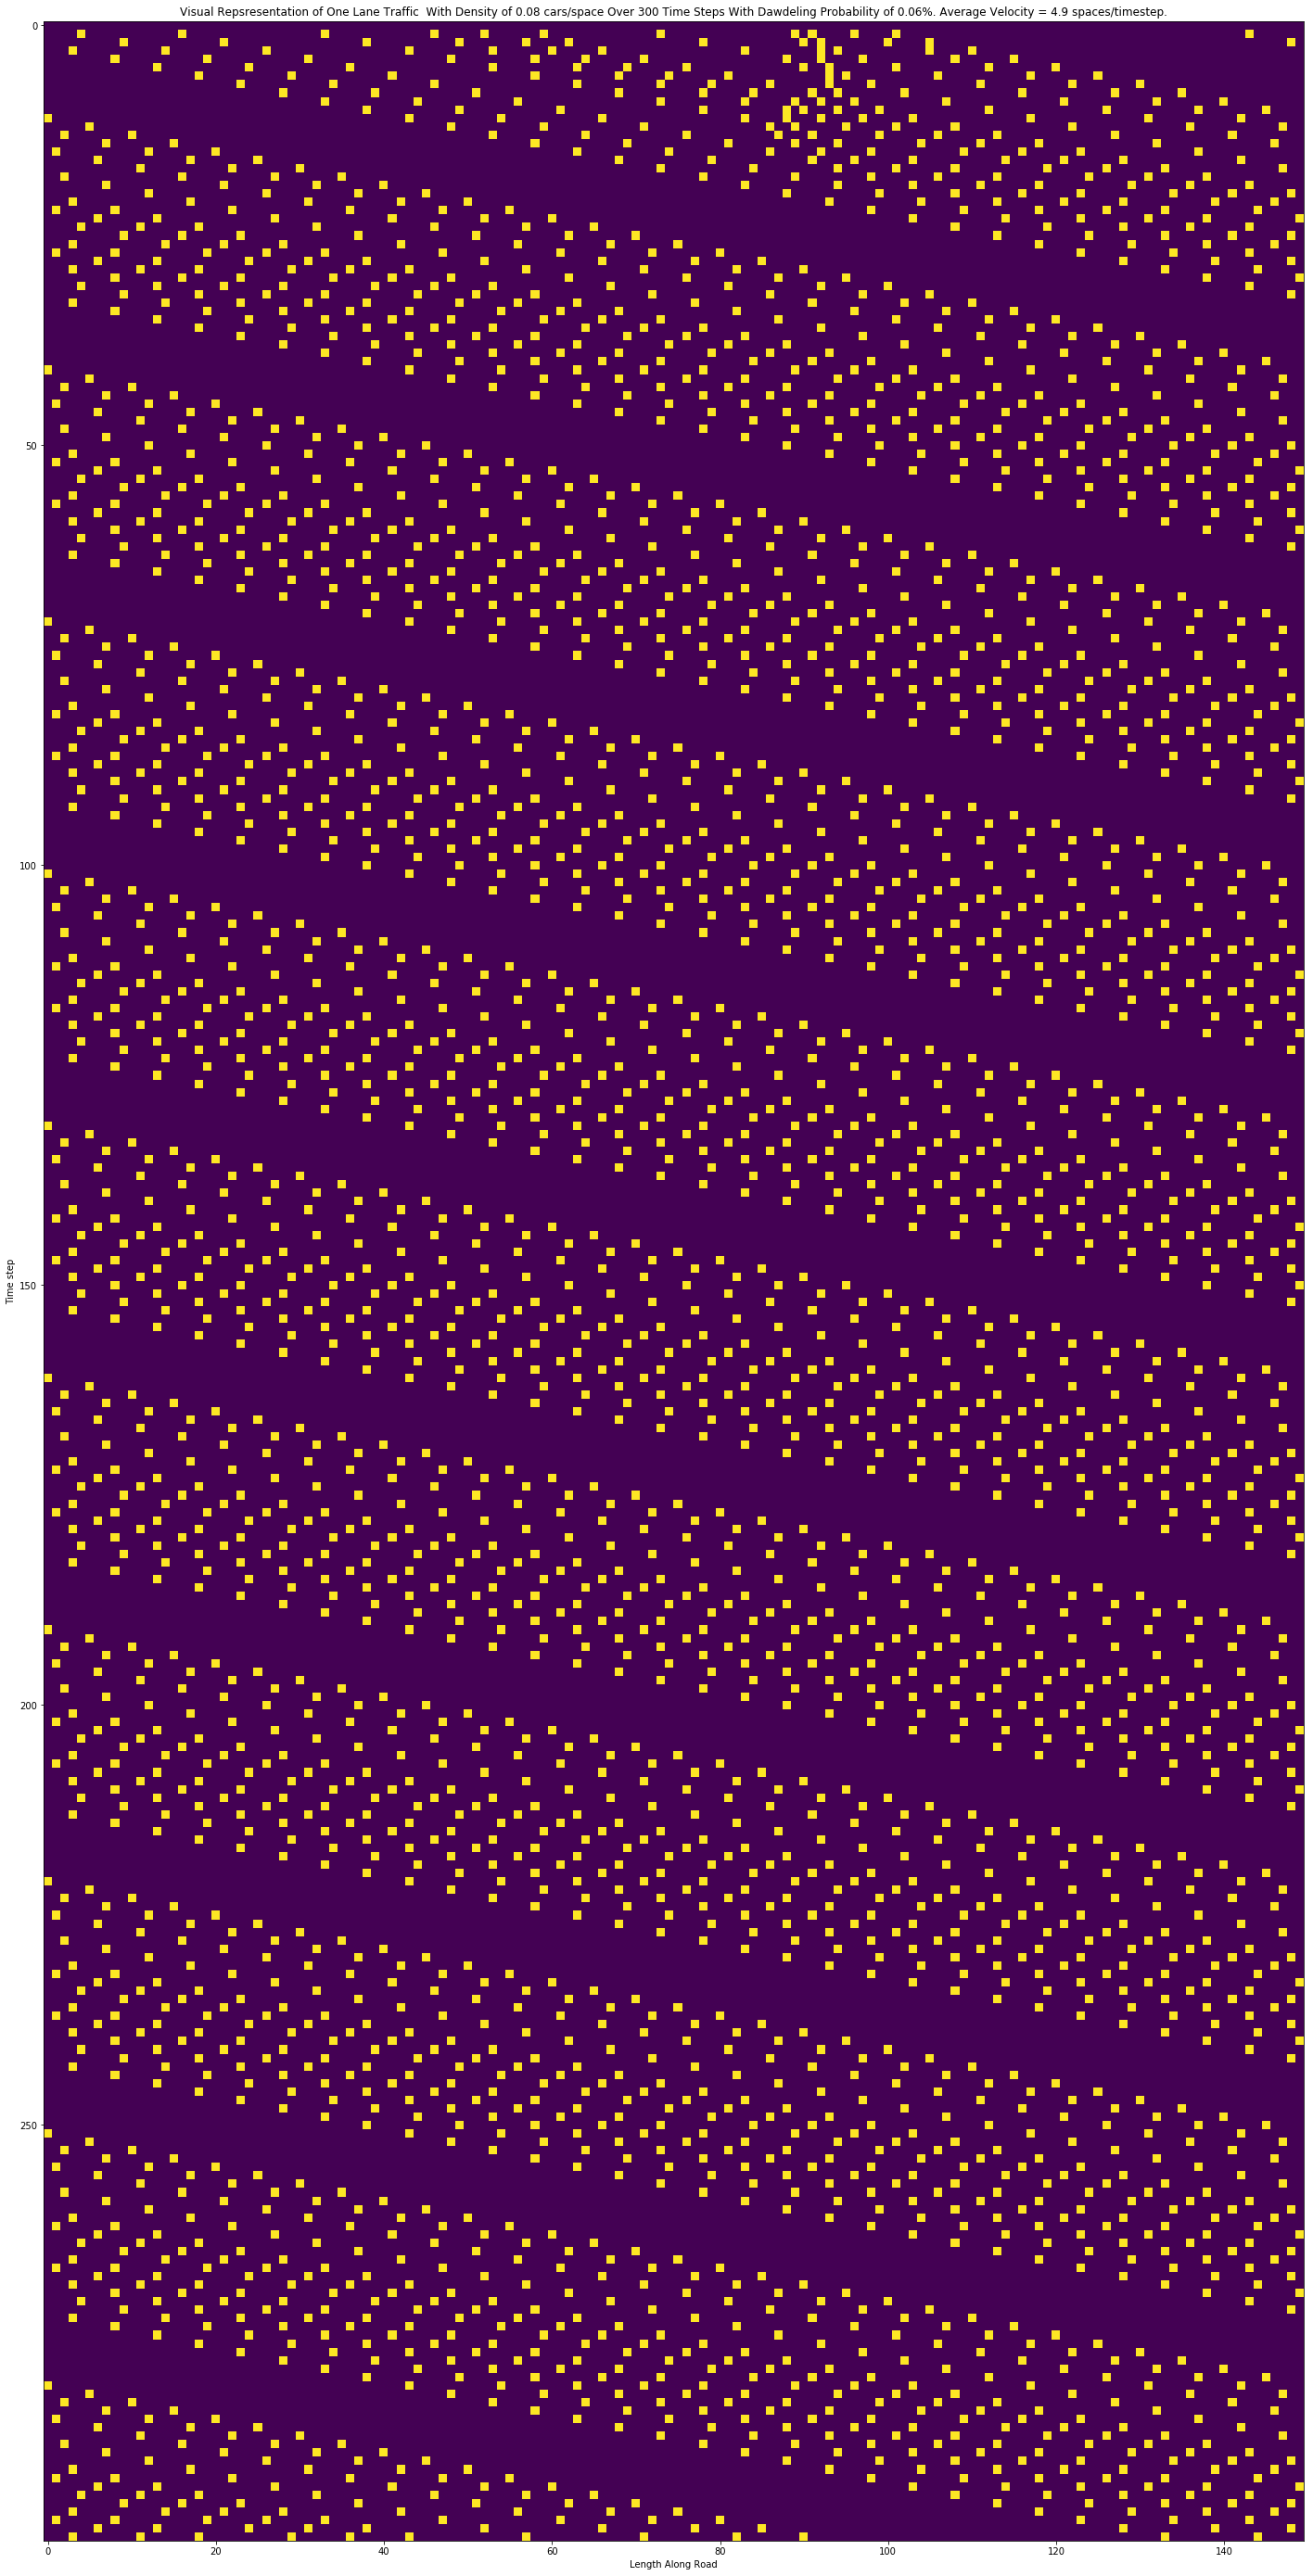

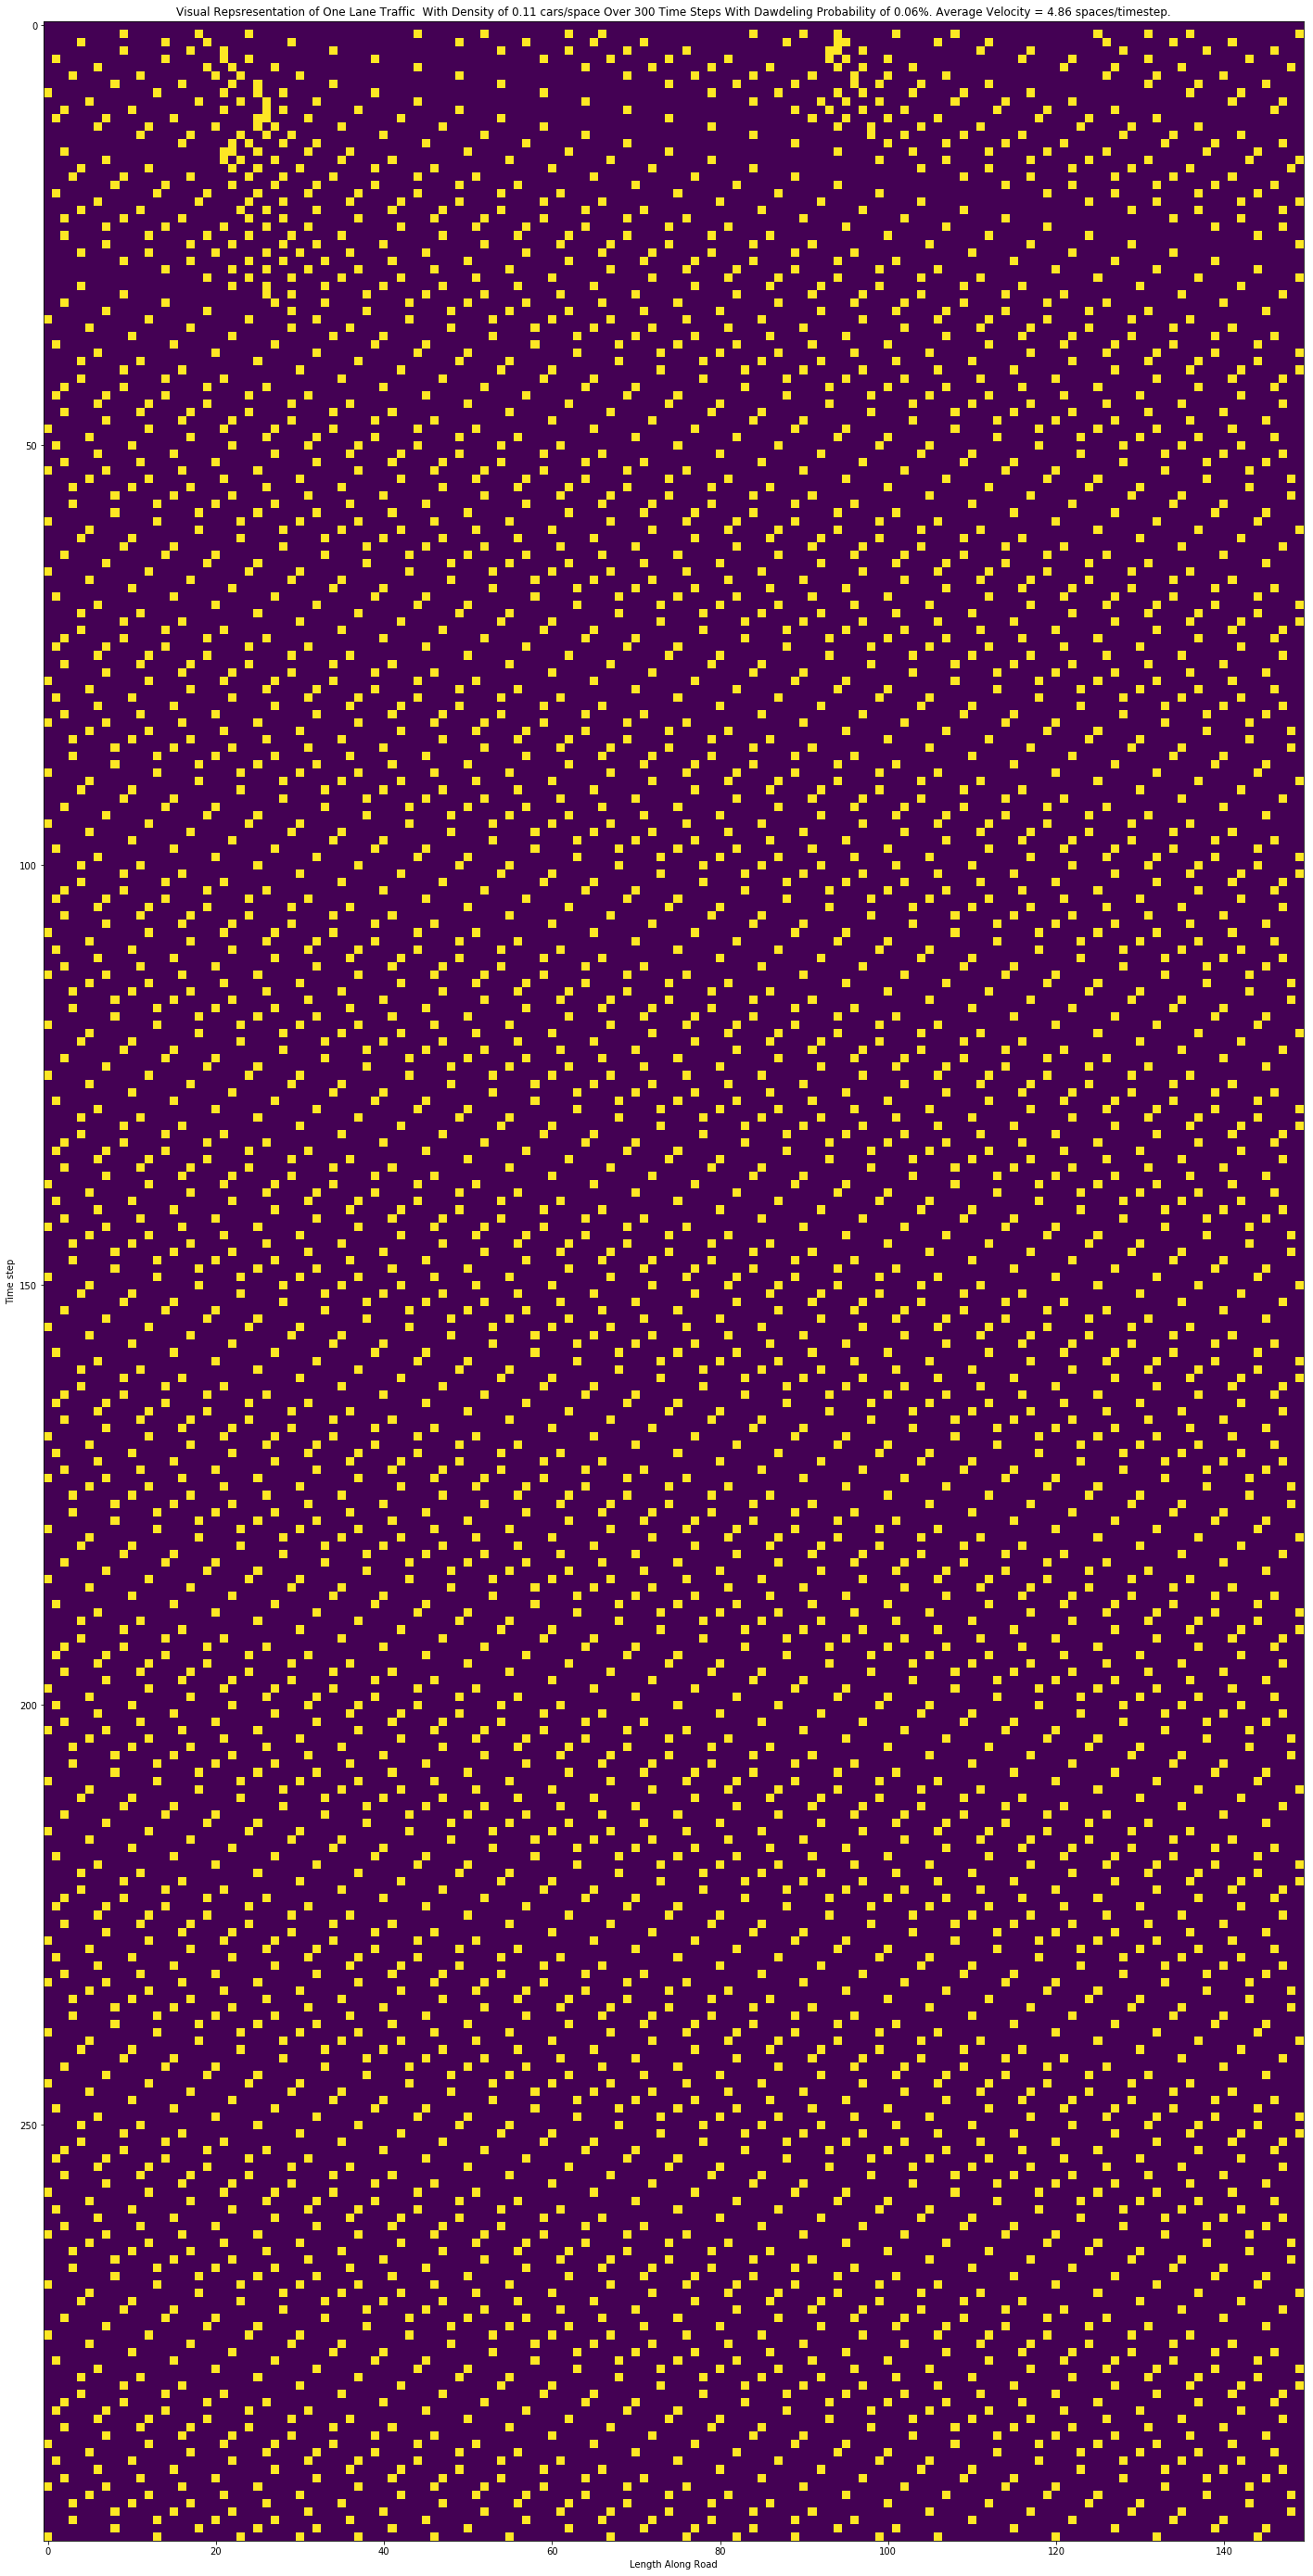

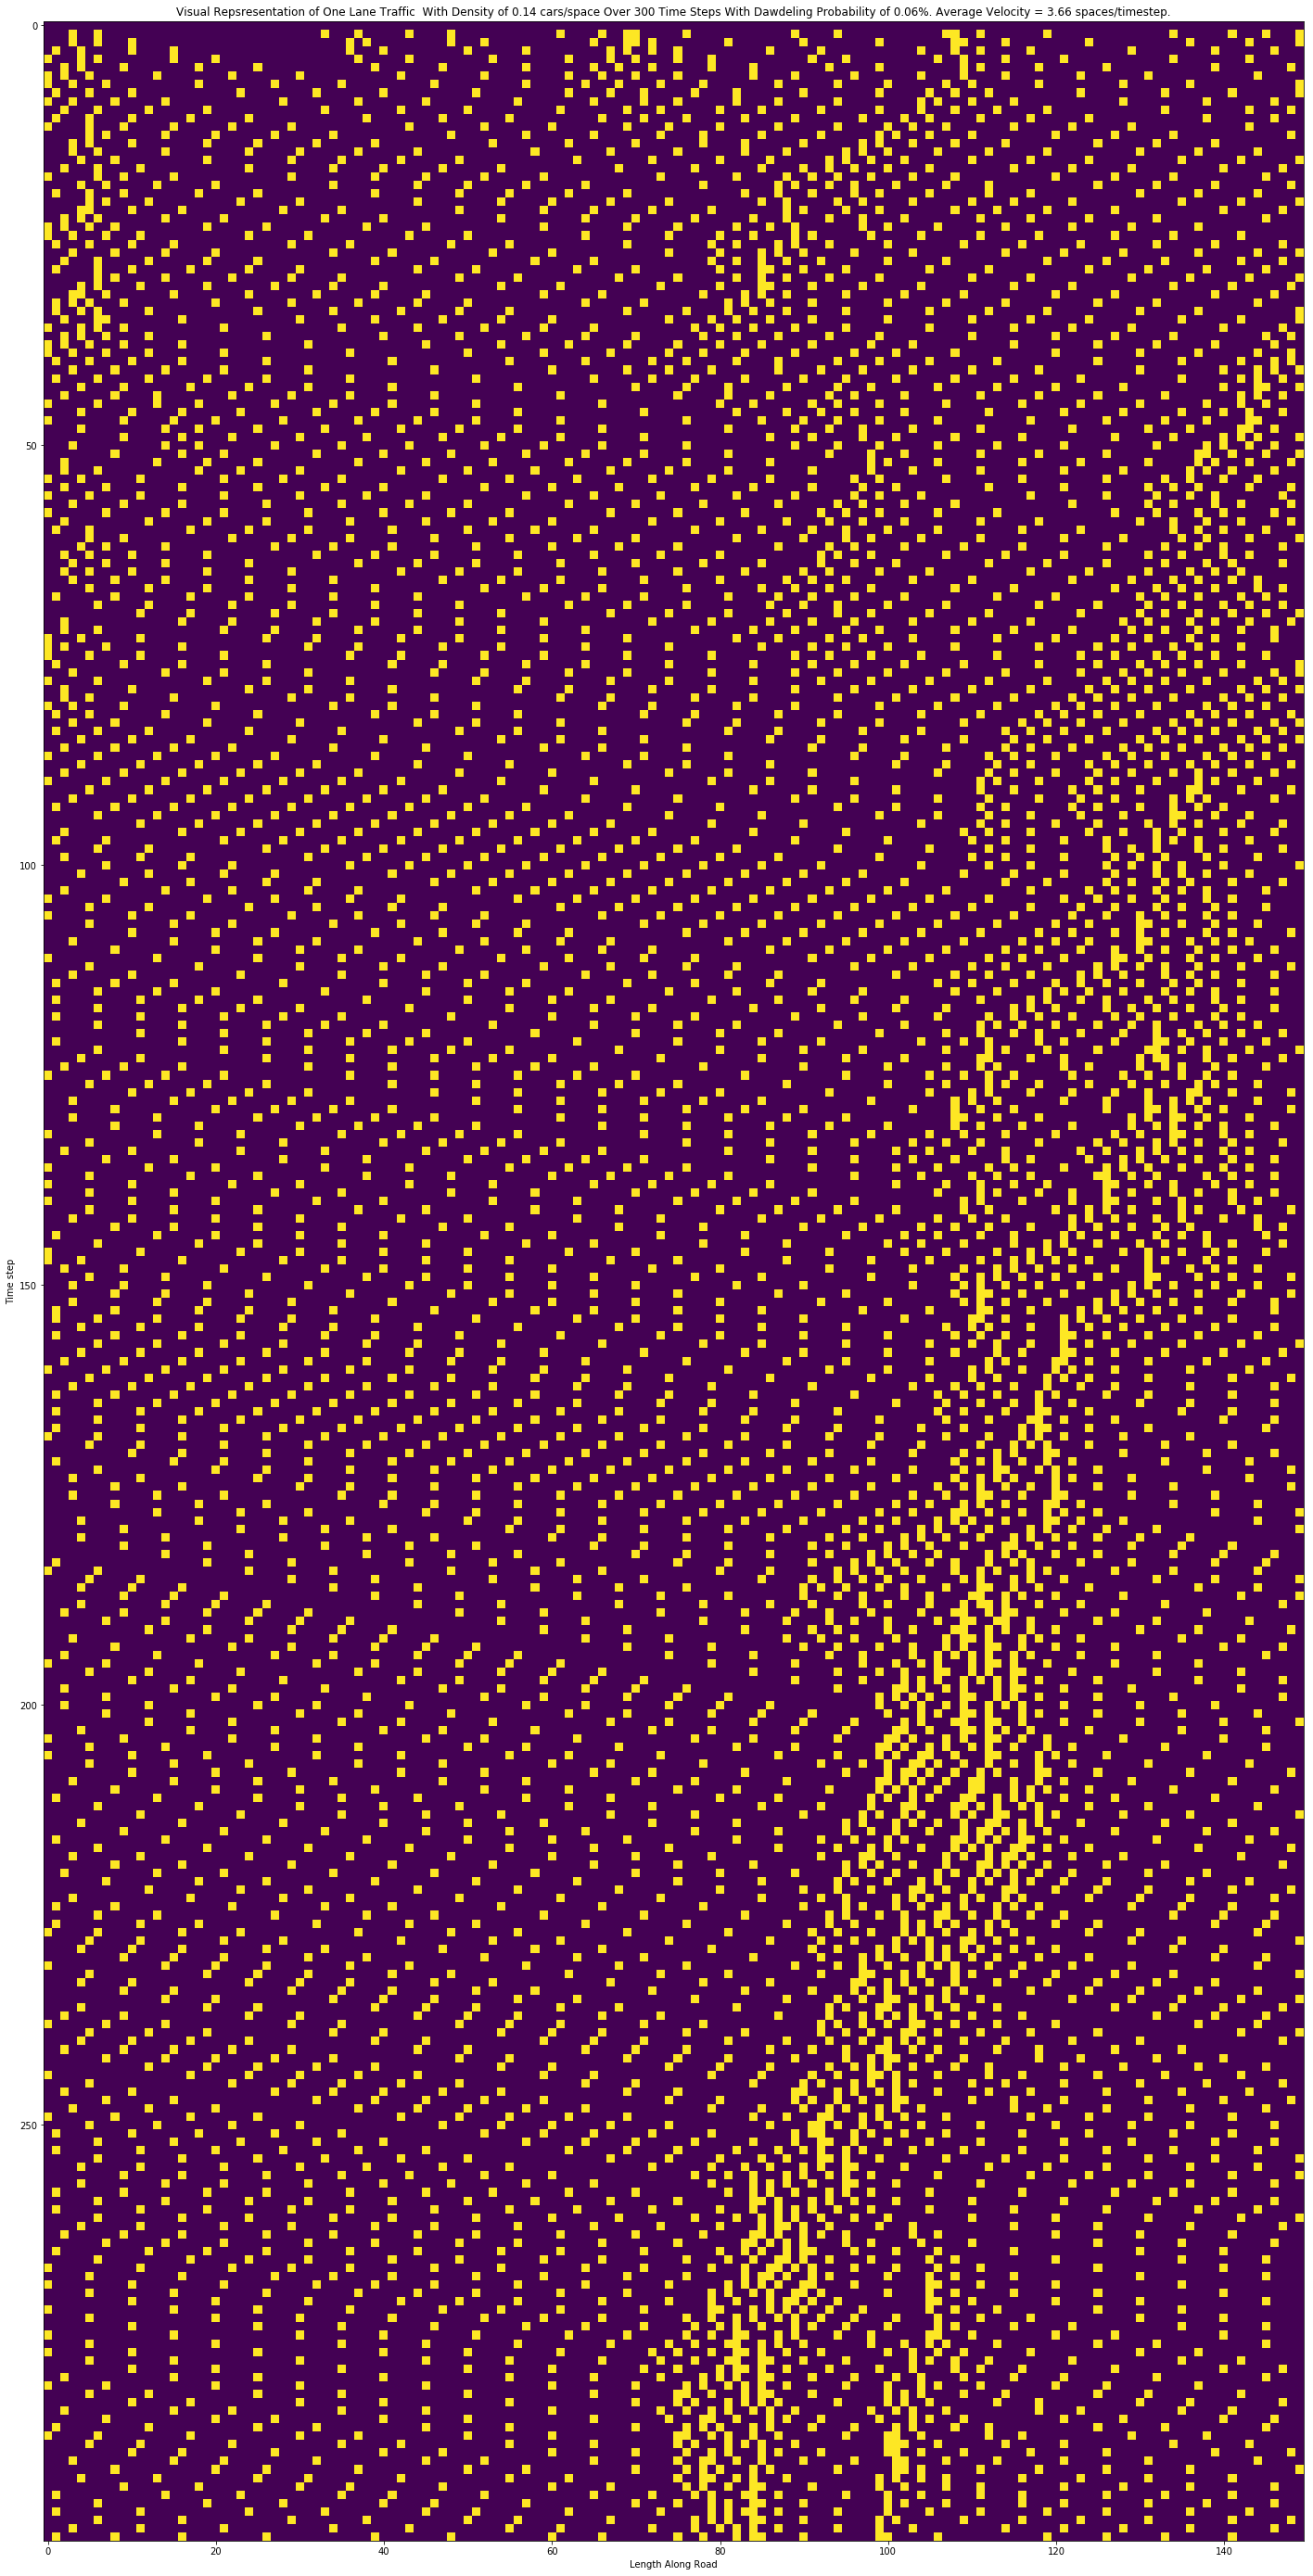

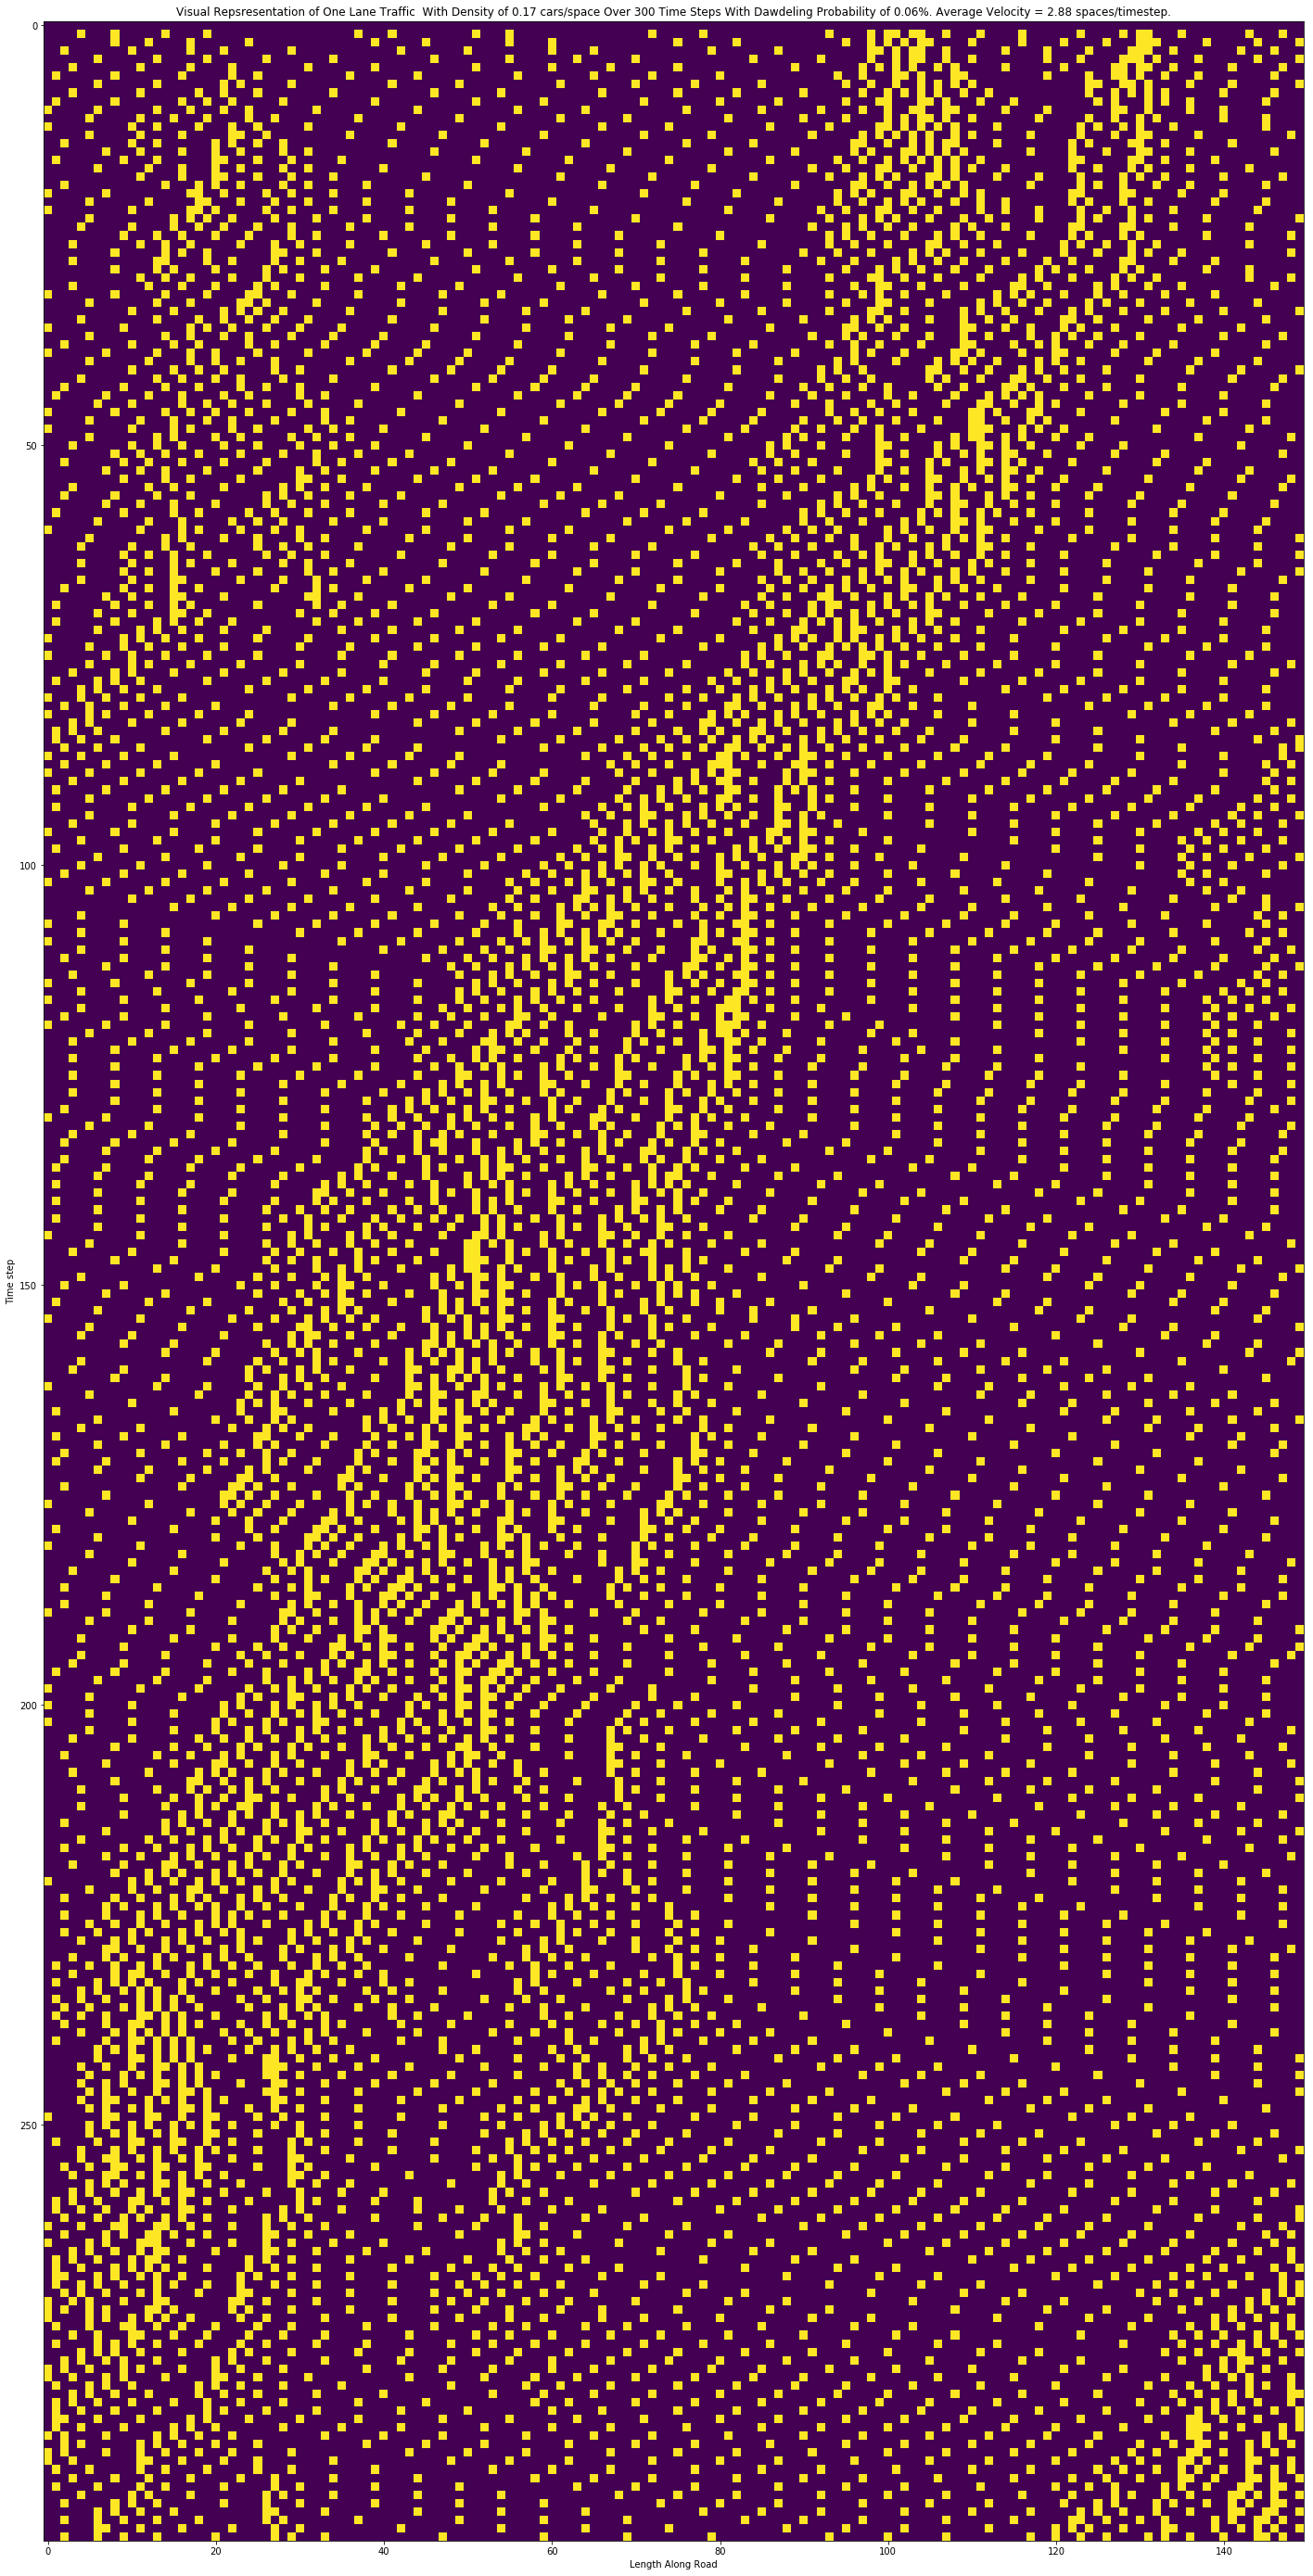

In [3]:
for i in range(8, 20, 3):
    single_lane_road_periodic(150, 2, 6, i/100, 6/100, 300) #various different car densities